# MATH 210 Introduction to Mathematical Computing

## November 16, 2018

* Eigenvalues and eigenvectors
* scipy.linalg.eig
* Applications: Simple, connected, undirected graphs

## Eigenvalues and eigenvectors

Let $A$ be a $n$ by $n$ matrix. An [eigenvalue](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of $A$ is a number $\lambda$ (perhaps complex) such that

$$
A \mathbf{v} = \lambda \mathbf{v}
$$

for some nonzero vector $\mathbf{v}$ called the eigenvector for eigenvalue $\lambda$.

To find eigenvalues and eigenvectors, we solve

$$
(A - \lambda I_n)\mathbf{v} = \mathbf{0}
$$

where $I_n$ is the identity matrix of size $n$. This has a nonzero solution only if $A - \lambda I_n$ is singular, $\mathrm{det}(A - \lambda I_n) = 0$.

The degree $n$ polynomial

$$
p(\lambda) = \mathrm{det}(A - \lambda I_n)
$$

is called the characteristic polynomial. The roots are the eigenvalues. An $n$ by $n$ matrix has $n$ eigenvalues (perhaps complex, perhaps repeated).

## scipy.linalg.eig

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

The function [`scipy.linalg.eig`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html) computes eigenvalues and eigenvectors of a square matrix $A$.

In [2]:
A = np.array([[1,0],[0,-2]])

In [3]:
la.eig(A)

(array([ 1.+0.j, -2.+0.j]), array([[ 1.,  0.],
        [ 0.,  1.]]))

Note that the output of `la.eig` is a tuple `(eigvals,eigvecs)` where `eigvals` is a 1D NumPy array of complex numbers giving the eigenvalues of $A$, and `eigvecs` is a 2D NumPy array with eigenvectors in the columns.

This means that we should unpack the tuple:

In [4]:
eigvals, eigvecs = la.eig(A)

In [5]:
eigvals

array([ 1.+0.j, -2.+0.j])

In [6]:
eigvecs

array([[ 1.,  0.],
       [ 0.,  1.]])

If we know that the eigenvalues are real numbers (ie. if $A$ is symmetric), then we can use `.real` to convert to real numbers.

In [7]:
eigvals = eigvals.real

In [8]:
eigvals

array([ 1., -2.])

Notice that the position of an eigenvalue in the array `eigvals` correspond to the column in `eigvecs` with its eigenvector.

In [9]:
eigvals[1]

-2.0

In [10]:
eigvecs

array([[ 1.,  0.],
       [ 0.,  1.]])

In [11]:
eigvecs[:,1].reshape(2,1)

array([[ 0.],
       [ 1.]])

In [12]:
A@eigvecs[:,1].reshape(2,1)

array([[ 0.],
       [-2.]])

In [13]:
np.argmax(eigvals)

0

## Applications

A [simple, connected, undirected graph](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)) is a set of vertices and edges connecting some of the vertices. Let's use the Python package [NetworkX](https://networkx.github.io/) to construct and visualize some simple graphs.

In [14]:
import networkx as nx

In [15]:
G = nx.complete_graph(10)

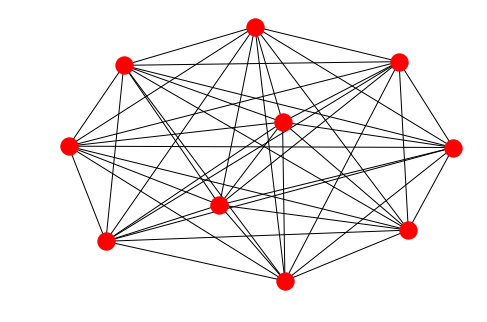

In [16]:
nx.draw(G)

The [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) $A_G$ of a graph $G$ with $n$ vertices is the square matrix of size $n$ such that $A_{i,j} = 1$ if vertices $i$ and $j$ are connected by an edge, and $A_{i,j} = 0$ otherwise.

We can use `networkx` to get the adjacency matrix of a graph $G$. The function `nx.adjacency_matrix` returns a [sparse matrix](https://docs.scipy.org/doc/scipy/reference/sparse.html) and we convert it to a regular NumPy array using the [todense] function.

In [17]:
A = nx.adjacency_matrix(G).todense()

In [18]:
A

matrix([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=int64)

[Spectral graph theory](https://en.wikipedia.org/wiki/Spectral_graph_theory) is the study of the eigenvalues of the adjacency matrix (and other associated matrices) and the relationships to the structure of $G$.

For example, the number of triangles $T(G)$ in a graph is given by

$$
\lambda_0^3 + \lambda_1^3 + \cdots + \lambda_n^3 = 6T(G)
$$

where $\lambda_0,\lambda_1,\dots,\lambda_n$ are the eigenvalues of $A_G$.

In [19]:
C3 = nx.complete_graph(3)

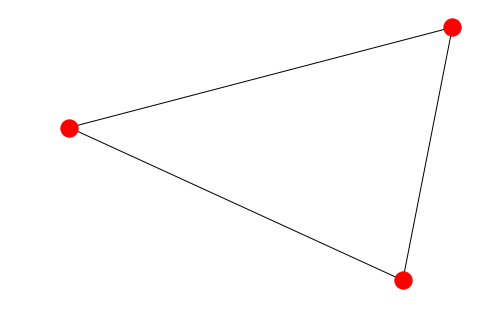

In [20]:
nx.draw(C3)

In [21]:
A3 = nx.adjacency_matrix(C3).todense()
eigvals, eigvecs = la.eig(A3)
np.sum(eigvals.real**3)/6

0.99999999999999911

In [22]:
C7 = nx.complete_graph(7)

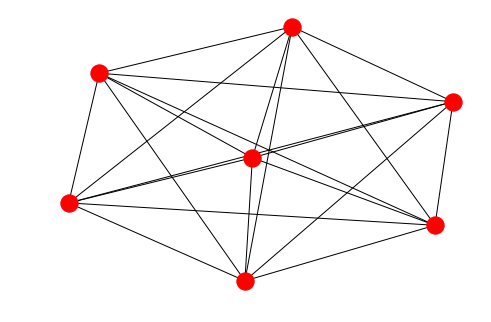

In [23]:
nx.draw(C7)

In [24]:
A7 = nx.adjacency_matrix(C7).todense()
eigvals, eigvecs = la.eig(A7)
np.sum(eigvals.real**3)/6

35.00000000000005

There are 35 triangles in the [complete graph](https://en.wikipedia.org/wiki/Complete_graph) with 7 vertices!